In [1]:
import os
import numpy as np
import pandas as pd
from   tqdm.notebook import trange
from   tti_explorer import config, utils
from   tti_explorer.case import simulate_case, CaseFactors
from   tti_explorer.contacts import EmpiricalContactsSimulator
from   tti_explorer.strategies import TTIFlowModel, RETURN_KEYS
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

from   matplotlib import colors as mcolors
from   matplotlib import cm
import numpy as np
import GPy
from   emukit.core import ContinuousParameter, ParameterSpace
from   emukit.sensitivity.monte_carlo import ModelFreeMonteCarloSensitivity
from   emukit.core.initial_designs import RandomDesign
from   GPy.models import GPRegression
from   emukit.model_wrappers import GPyModelWrapper
from   emukit.sensitivity.monte_carlo import MonteCarloSensitivity
from   emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from   emukit.experimental_design.experimental_design_loop import ExperimentalDesignLoop
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai
import pandas as pd
from   tti_explorer.strategies import TTIFlowModel
def print_doc(func):
    print(func.__doc__)
rng = np.random.RandomState(0)

def load_csv(pth):
    return np.loadtxt(pth, dtype=int, skiprows=1, delimiter=",")
path_to_bbc_data = os.path.join("../../data", "bbc-pandemic")


def update_policy_config(app_uptake, pol_compl, wfh, go_to_school_prob, asym_fac):
    policy_config['app_cov'] = app_uptake
    policy_config['compliance'] = pol_compl
    policy_config['wfh_prob'] = wfh
    policy_config['go_to_school_prob']  = go_to_school_prob
    contacts_config['asymp_factor']=asym_fac
    return policy_config, contacts_config


#     contacts_config['work_sar']=work_sar
def update_policy_config(app_uptake, pol_compl):
    policy_config['app_cov'] = app_uptake
    policy_config['compliance'] = pol_compl
    return policy_config

# policy_config = update_policy_config(0.5, 0.05)
# Separating this because it is built from the ammended policy_config

from scipy.stats import gamma


def update_case_config(p_day_noticed_symptoms_ab, inf_profile_ab):
    alpha = [p_day_noticed_symptoms_ab[0], inf_profile_ab[0]]
    beta = [p_day_noticed_symptoms_ab[1], inf_profile_ab[1]]
    strs = ['p_day_noticed_symptoms', 'inf_profile']
    
    for i in range(2):
    
        x = np.linspace(gamma.pdf(0.01, a=alpha[i], scale=1/beta[i]),
                        gamma.pdf(0.99, a=alpha[i], scale=1/beta[i]), 10)

        #apply softmax
        norm = np.exp(x)
        s = sum(norm)
        norm = np.round(norm/s, decimals=2)
        norm[-1] = 1- sum(norm[:-1])

        case_config[strs[i]] = norm
    
    return case_config



def update_policy_config(compliance, app_cov, latent_var):
    policy_config['compliance'] = compliance
    policy_config['app_cov'] = app_cov
    policy_config['latent_period'] = int(latent_var)
    
    return policy_config





[[6.32120889e-01 6.73232420e-01 5.68164471e+00]
 [1.64189868e-01 3.86997283e-01 1.11690145e+00]
 [5.51679562e-01 8.77106903e-01 5.52683811e+00]
 [2.95598502e-01 9.18386154e-01 2.17889799e+00]
 [3.07969546e-01 4.15030609e-01 3.51177692e+00]
 [2.76768461e-01 7.34678423e-01 5.78491023e+00]
 [7.69908969e-02 8.83999077e-01 1.83384119e+00]
 [4.88847167e-01 4.05196091e-01 1.61074293e+00]
 [8.64107119e-01 4.04380062e-01 2.77259720e+00]
 [2.28598516e-02 8.82697942e-04 1.39103292e+00]
 [6.81937723e-01 9.05707344e-01 1.81448360e+00]
 [9.05394771e-01 5.13354480e-01 1.77887089e+00]
 [6.16582269e-01 5.76811618e-01 3.22149541e+00]
 [9.53567173e-01 9.47659009e-01 1.79919506e+00]
 [6.28511357e-01 7.99939582e-01 5.73404045e+00]
 [2.32565298e-01 5.07683123e-01 4.39124782e+00]
 [8.04142264e-02 1.78349297e-01 3.97237187e+00]
 [5.31490962e-02 1.40594795e-01 5.72842132e+00]
 [8.01721972e-01 7.38694218e-01 1.48988896e+00]
 [6.38969467e-01 7.96191777e-01 1.36274931e+00]
 [2.10113123e-01 3.56908703e-02 1.718997


Optimization restart 1/1, f = 21.451008889375842
Optimization restart 1/1, f = 21.451008888478597



Optimization restart 1/1, f = 21.53062055578807



Optimization restart 1/1, f = 21.72358463571132



Optimization restart 1/1, f = 22.189305966730245



Optimization restart 1/1, f = 22.25994739408405



Optimization restart 1/1, f = 22.104301182395425



Optimization restart 1/1, f = 21.844287427915653



Optimization restart 1/1, f = 21.374149221686437



Optimization restart 1/1, f = 21.021872504663193



Optimization restart 1/1, f = 21.543897306742927



Optimization restart 1/1, f = 21.42520071636966



Optimization restart 1/1, f = 20.80176678072189



Optimization restart 1/1, f = 20.278601202479308



Optimization restart 1/1, f = 19.828521494239162



Optimization restart 1/1, f = 19.605778916246777



Optimization restart 1/1, f = 19.0441700455738



Optimization restart 1/1, f = 19.11972535303026



Optimization restart 1/1, f = 18.799749627184013



Optimization restart 1/1, f = 19.237393368688487



Optimization restart 1/1, f = 19.553514305821246



Optimization restart 1/1, f = 18.899403508084887



Optimization restart 1/1, f = 18.246747318414286



Optimization restart 1/1, f = 16.51712777629421



Optimization restart 1/1, f = 16.060573203515375



Optimization restart 1/1, f = 15.521231657905865



Optimization restart 1/1, f = 15.291640292674316
main_effects:  {'compliance': array([0.95251469]), 'app_cov': array([0.12862754]), 'latent_period': array([0.10705014])}
total_effects:  {'compliance': array([0.8901825]), 'app_cov': array([-0.22021296]), 'latent_period': array([-0.18973117])}
[[8.65189892e-01 3.59235709e-01 3.88774939e+00]
 [8.09797750e-01 7.08743822e-01 1.03479443e+00]
 [6.96697615e-01 2.31269485e-01 5.77732006e+00]
 [1.37440096e-01 7.15453304e-01 4.53204873e+00]
 [6.72328758e-01 3.42636135e-01 1.80300067e+00]
 [3.95666611e-02 3.54969298e-01 5.44839877e+00]
 [3.11381419e-01 7.16114153e-01 3.09334086e+00]
 [7.11174391e-01 8.05335890e-01 5.33564270e+00]
 [6.42821119e-01 4.80873787e-01 1.42906492e+00]
 [2.78996250e-01 9.85857325e-01 5.22425165e+00]
 [5.05258108e-01 4.09902393e-01 5.73552539e+00]
 [4.19250237e-01 6.44105098e-01 5.35069601e+00]
 [8.45374954e-01 8.62434093e-01 4.21800558e+00]
 [1.09926089e-01 4.23101263e-01 1.96601540e+00]
 [9.37445999e-01 8.69066030e-01 2.


Optimization restart 1/1, f = -10.837439473335564
Optimization restart 1/1, f = -10.837439473374879



Optimization restart 1/1, f = -10.89600817413487



Optimization restart 1/1, f = -10.907027828471755



Optimization restart 1/1, f = -11.227769090342647



Optimization restart 1/1, f = -11.487616999661334



Optimization restart 1/1, f = -11.842927273761568



Optimization restart 1/1, f = -12.276471904100518



Optimization restart 1/1, f = -11.723666039459928



Optimization restart 1/1, f = -11.887284708117441



Optimization restart 1/1, f = -12.234126201446479



Optimization restart 1/1, f = -11.569816474307139



Optimization restart 1/1, f = -12.024127717601722



Optimization restart 1/1, f = -11.681559653070849



Optimization restart 1/1, f = -12.46624004961236



Optimization restart 1/1, f = -13.00997109813757



Optimization restart 1/1, f = -12.503492002046428



Optimization restart 1/1, f = -12.506348817556436



Optimization restart 1/1, f = -11.10442580595808



Optimization restart 1/1, f = -11.500070248954977



Optimization restart 1/1, f = -11.317410474307913



Optimization restart 1/1, f = -11.948607136213873



Optimization restart 1/1, f = -12.865514961572224



Optimization restart 1/1, f = -12.41010632309876



Optimization restart 1/1, f = -13.023687629513276



Optimization restart 1/1, f = -12.915521364335916



Optimization restart 1/1, f = -13.686233496226322
main_effects:  {'compliance': array([0.92242802]), 'app_cov': array([-0.00773027]), 'latent_period': array([-0.01107733])}
total_effects:  {'compliance': array([1.02726623]), 'app_cov': array([0.06535824]), 'latent_period': array([0.11750122])}
[[9.76791826e-01 6.39982674e-01 1.25499810e+00]
 [3.44330773e-02 1.80812068e-01 5.81798034e+00]
 [2.07253512e-01 9.50453954e-01 4.23553536e+00]
 [4.26895254e-01 1.09046688e-01 1.72731280e+00]
 [1.44325280e-01 4.36231763e-03 2.10015815e+00]
 [3.33685749e-02 2.23759656e-02 1.19210594e+00]
 [9.60212351e-01 6.03217838e-01 1.63340309e+00]
 [8.54461030e-01 9.44416187e-01 1.74653470e+00]
 [7.00623592e-01 2.48085664e-01 4.89069110e+00]
 [5.43908296e-01 9.38229236e-01 3.34861448e+00]
 [2.44298441e-01 8.16797935e-01 1.46009288e+00]
 [9.21556359e-01 4.23556702e-01 2.49458699e+00]
 [9.30787087e-02 3.36064953e-01 3.35079231e+00]
 [4.79126183e-01 2.35645871e-01 1.44475763e+00]
 [5.90826757e-01 9.26044060e-02 


Optimization restart 1/1, f = -18.309668442371
Optimization restart 1/1, f = -18.309668442383447



Optimization restart 1/1, f = -18.172366534825088



Optimization restart 1/1, f = -18.556209928542167



Optimization restart 1/1, f = -19.062078943374402



Optimization restart 1/1, f = -19.695191229333304



Optimization restart 1/1, f = -20.331783244705058



Optimization restart 1/1, f = -20.349380689987292



Optimization restart 1/1, f = -19.815400429958103



Optimization restart 1/1, f = -19.84207114971322



Optimization restart 1/1, f = -20.40610932986114



Optimization restart 1/1, f = -20.839845775414418



Optimization restart 1/1, f = -21.398041594129147



Optimization restart 1/1, f = -22.09916050339153



Optimization restart 1/1, f = -23.046264666267675



Optimization restart 1/1, f = -23.884463955061193



Optimization restart 1/1, f = -24.629890585276016



Optimization restart 1/1, f = -25.399483091678498



Optimization restart 1/1, f = -25.678788692594004



Optimization restart 1/1, f = -27.01127781707602



Optimization restart 1/1, f = -27.855143691915295



Optimization restart 1/1, f = -28.037489033634515



Optimization restart 1/1, f = -27.564532444910228



Optimization restart 1/1, f = -28.10742860331841



Optimization restart 1/1, f = -29.452635817374514



Optimization restart 1/1, f = -30.315001072186448



Optimization restart 1/1, f = -31.58520872894504
main_effects:  {'compliance': array([0.94374997]), 'app_cov': array([-0.11237351]), 'latent_period': array([-0.08322017])}
total_effects:  {'compliance': array([1.1057559]), 'app_cov': array([0.26560452]), 'latent_period': array([0.2529563])}
[[9.80833176e-01 3.03033278e-01 2.64112050e+00]
 [4.12469147e-01 7.93968876e-01 3.61583598e+00]
 [2.58936915e-01 8.45529727e-01 2.82300715e+00]
 [4.08547391e-01 7.51394331e-01 2.25979483e+00]
 [5.26035988e-02 5.96431414e-01 3.19411569e+00]
 [3.52151119e-01 6.13924684e-01 1.79629760e+00]
 [6.92281094e-01 2.96309951e-01 2.98157984e+00]
 [4.55741875e-01 2.37836779e-01 4.65731631e+00]
 [1.43228950e-01 7.49585314e-01 4.37839395e+00]
 [8.76769767e-01 7.34839254e-01 4.27376856e+00]
 [4.77043661e-01 2.76012700e-01 3.09744134e+00]
 [1.75830486e-01 9.41845076e-01 4.54151158e+00]
 [4.81467530e-01 3.10114820e-01 3.04524835e+00]
 [3.46017922e-01 4.47059050e-01 5.94363644e+00]
 [7.99039837e-01 2.89314357e-01 1.0


Optimization restart 1/1, f = -21.91451502656802
Optimization restart 1/1, f = -21.914515026594714



Optimization restart 1/1, f = -21.387793177242422



Optimization restart 1/1, f = -21.633457548120454



Optimization restart 1/1, f = -21.95525533694118



Optimization restart 1/1, f = -21.850068088044978



Optimization restart 1/1, f = -22.157252021806734



Optimization restart 1/1, f = -22.20091466928757



Optimization restart 1/1, f = -22.38160453311179



Optimization restart 1/1, f = -22.788171662684967



Optimization restart 1/1, f = -23.357274749961498



Optimization restart 1/1, f = -23.93457729579594



Optimization restart 1/1, f = -23.374731213927667



Optimization restart 1/1, f = -25.16579178194275



Optimization restart 1/1, f = -25.61224531078657



Optimization restart 1/1, f = -25.66017834419138



Optimization restart 1/1, f = -25.88776336221801



Optimization restart 1/1, f = -25.924786397327118



Optimization restart 1/1, f = -26.5303216188883



Optimization restart 1/1, f = -26.73476592849893



Optimization restart 1/1, f = -27.38493396806672



Optimization restart 1/1, f = -28.16968779355851



Optimization restart 1/1, f = -29.246315663849032



Optimization restart 1/1, f = -28.867901174437392



Optimization restart 1/1, f = -28.824127556300873



Optimization restart 1/1, f = -29.489683762809285



Optimization restart 1/1, f = -30.412244101073497
main_effects:  {'compliance': array([0.91088763]), 'app_cov': array([0.08209682]), 'latent_period': array([0.10661181])}
total_effects:  {'compliance': array([0.89993826]), 'app_cov': array([-0.12606363]), 'latent_period': array([-0.09346696])}
[[4.05181282e-01 5.98670906e-01 3.62941562e+00]
 [7.08290270e-01 5.33374492e-01 1.79373235e+00]
 [4.06416089e-01 7.10464498e-01 1.64224354e+00]
 [6.47399317e-01 7.19980980e-01 1.06841296e+00]
 [5.23929492e-01 3.06672307e-01 5.74318165e+00]
 [1.32940468e-01 3.66804846e-01 4.42243141e+00]
 [6.02274733e-01 1.20544960e-01 3.64743409e+00]
 [7.73925878e-01 2.09034748e-01 5.69804708e+00]
 [5.37654835e-01 3.61518170e-01 2.78048888e+00]
 [1.13083918e-01 3.35241899e-01 1.58878494e+00]
 [7.62848943e-01 9.50343831e-01 1.93219877e+00]
 [2.11843819e-01 7.46451281e-02 5.38741658e+00]
 [5.63683909e-01 7.79991890e-02 2.72653720e+00]
 [2.13871838e-01 6.36922148e-01 3.95072418e+00]
 [6.53250419e-01 6.91921916e-01 


Optimization restart 1/1, f = -32.757733125872576
Optimization restart 1/1, f = -32.7577331438181



Optimization restart 1/1, f = -33.05496118352951



Optimization restart 1/1, f = -33.245233813344065



Optimization restart 1/1, f = -33.68630892885128



Optimization restart 1/1, f = -33.74028935225655



Optimization restart 1/1, f = -34.2141813036265



Optimization restart 1/1, f = -34.04938399805134



Optimization restart 1/1, f = -34.63684961104023



Optimization restart 1/1, f = -35.179683221772926



Optimization restart 1/1, f = -36.63572382349824



Optimization restart 1/1, f = -37.25565331348093



Optimization restart 1/1, f = -37.97971580990572



Optimization restart 1/1, f = -38.50973748824185



Optimization restart 1/1, f = -38.675602082146376



Optimization restart 1/1, f = -39.319282986101456



Optimization restart 1/1, f = -40.39087636198737



Optimization restart 1/1, f = -40.216661013063586



Optimization restart 1/1, f = -41.29091159026395



Optimization restart 1/1, f = -42.11289035598661



Optimization restart 1/1, f = -43.10862016330856



Optimization restart 1/1, f = -44.058804903296675



Optimization restart 1/1, f = -44.69637125036528



Optimization restart 1/1, f = -45.13901980798867



Optimization restart 1/1, f = -46.14187972008349



Optimization restart 1/1, f = -46.36612232971792



Optimization restart 1/1, f = -47.30424077357956
main_effects:  {'compliance': array([0.89711257]), 'app_cov': array([-0.0221413]), 'latent_period': array([0.01592865])}
total_effects:  {'compliance': array([1.00348965]), 'app_cov': array([0.0687076]), 'latent_period': array([0.12525602])}


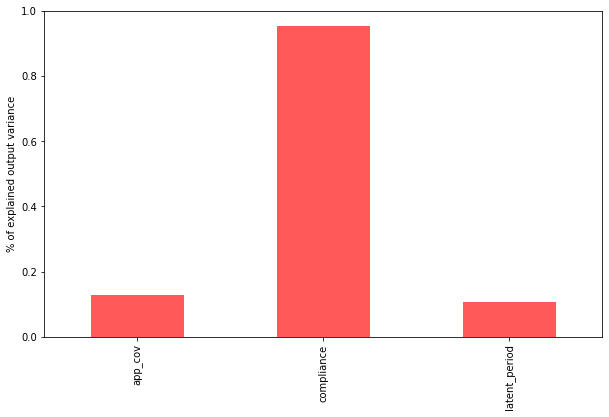

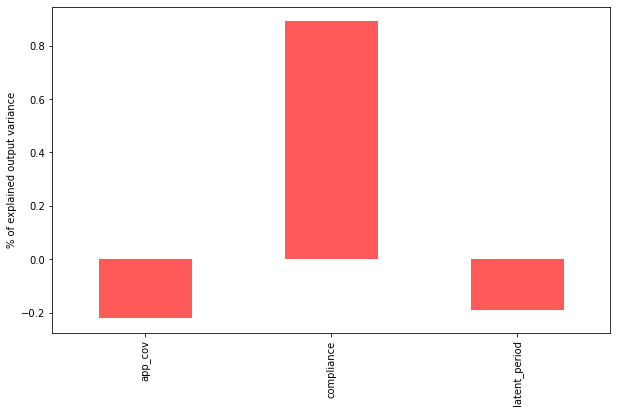

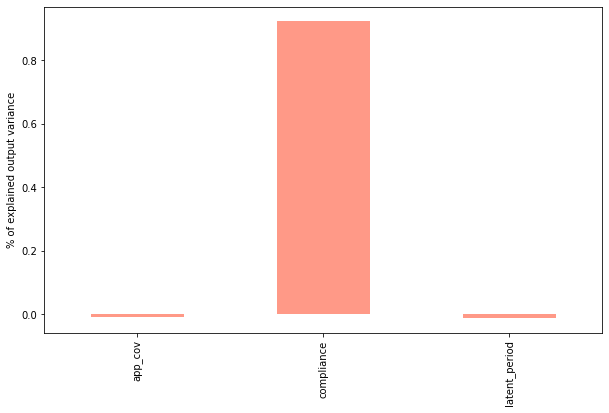

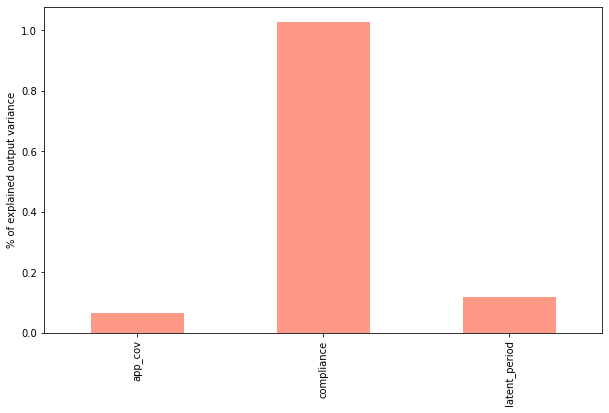

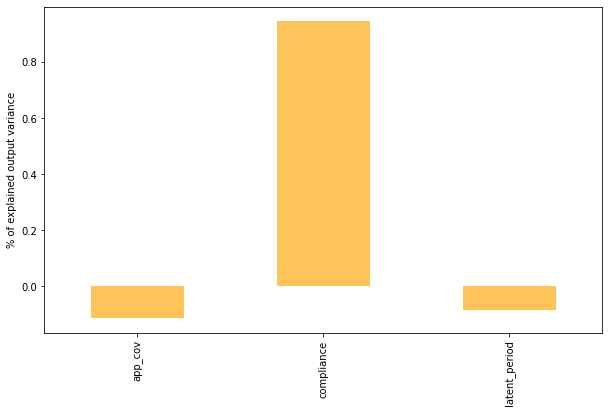

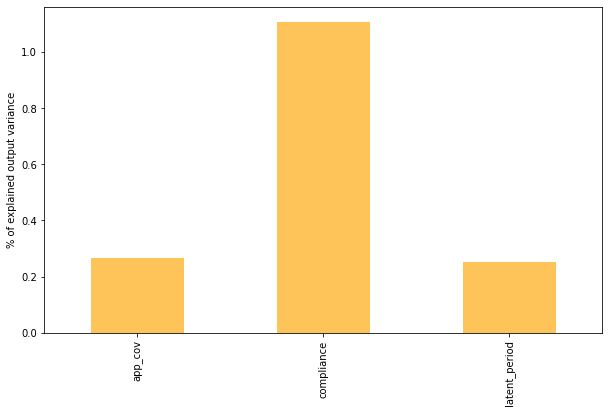

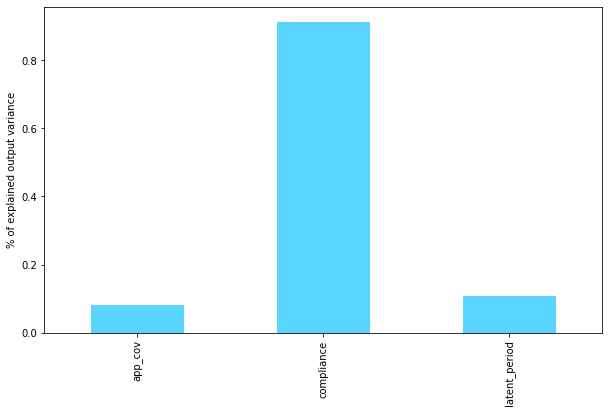

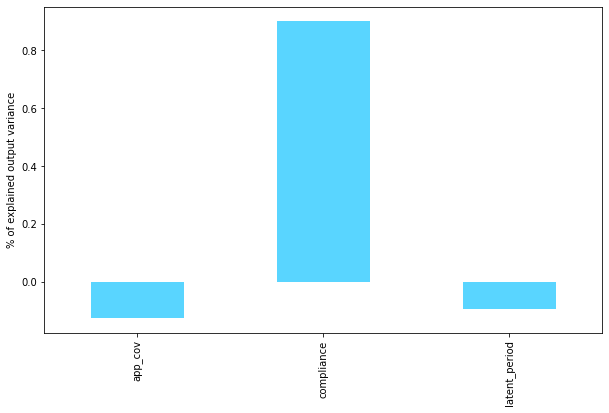

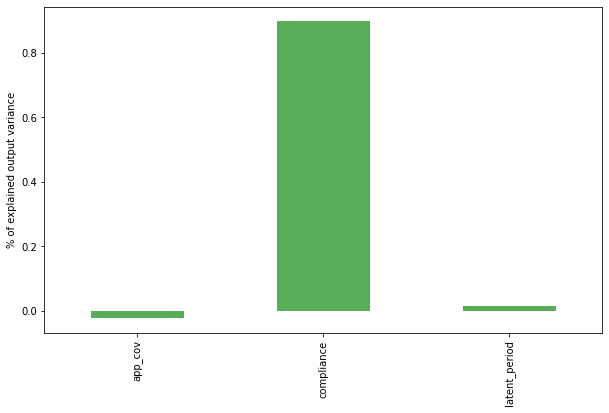

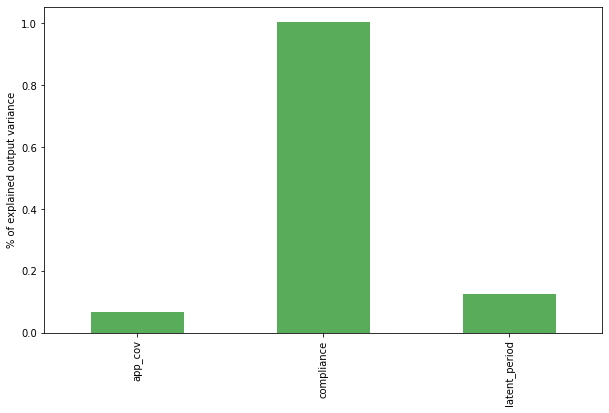

In [2]:




"""
Runs TTI simulator as many times as the different input initialisations.
The main reason we need this is to put in to EmuKit for the Experimental
Design Loop.

Args:
    pol_configs (list): Inputs are [app_cov, compliance]

Returns:
    effective_rs (np.expand_dims(np.array(to_return), 1)): For every simulation run, return
    the effective r, as was plotted form Bryn and Andrei previously.

"""
#simulate_contacts = EmpiricalContactsSimulator(over18, under18, rng)


def run_tti_sim(pol_configs):
    to_return=[]
    for vals in pol_configs:

        policy_config = update_policy_config(vals[0], vals[1], vals[2])
        factor_config = utils.get_sub_dictionary(policy_config, config.DELVE_CASE_FACTOR_KEYS)
        strategy_config = utils.get_sub_dictionary(policy_config, config.DELVE_STRATEGY_FACTOR_KEYS)
        tti_model = TTIFlowModel(rng, **strategy_config)
        n_cases = 10000
        outputs = list()
        temp =[]
        for _ in trange(n_cases):
            case = simulate_case(rng, **case_config)
            case_factors = CaseFactors.simulate_from(rng, case, **factor_config)
            contacts = simulate_contacts(case, **contacts_config)
            res = tti_model(case, contacts, case_factors)
            outputs.append(res)
            if res["Effective R"] >= 0:
                temp.append(res["Effective R"]) # Get effective R. Only non-nan vals are kept
        to_return.append(np.mean(temp))
    return np.expand_dims(np.array(to_return), 1)

v1 = [0.05, .99]
v2 = [0.2,.95]
v3 = [0.05, .99]
v4 = [0.05, .99]
v5 = [0.05, .99]
# v6 = [0.05, .4]



def run_sensitivity(strigency, initial_samples, bo_samples, mc_samples, col):

    compliance_domain = [0, 0.99] 
    app_cov_domain = [0, 0.99]
    latent_domain = [1,6] 

    # Set variables range. Since we are dealing with percentages (app_cov, compliance)
    # [0.05, 1] should do.
    initial_samples = 100 # number of random runs to perform before starting experimental design 
    space = ParameterSpace([ContinuousParameter('compliance', *compliance_domain),
                            ContinuousParameter('app_cov', *app_cov_domain),
                            ContinuousParameter('latent_period', *latent_domain)]) # init param space for experimental design
    design = RandomDesign(space)
    x = design.get_samples(initial_samples) # get 5 random combinations of initialisations

    print(x)
    y = run_tti_sim(x) # obtain corresponding effective_rs

    # Fitting emulator to data, x: (app_cov, compliance), y: effective_r
    Num_of_param = 3
    kern_eq = GPy.kern.RBF(input_dim=Num_of_param, ARD = True)
    kern_bias = GPy.kern.Bias(input_dim=Num_of_param)
    kern = kern_eq + kern_bias
    model_gpy = GPRegression(x,y, kern)
    model_gpy.kern.variance = 1**2
    model_gpy.likelihood.variance.fix(1e-5)
    model_emukit = GPyModelWrapper(model_gpy) 
    model_emukit.optimize() # optimise (max log-lik)

    # Initialise experimental design loop. Using integrated variance as acquisition
    # to "query" the input space aiming to reduce uncertainty over the func we're approx. i.e. effective_r
    # Initialise experimental design loop. Using integrated variance as acquisition
    # to "query" the input space aiming to reduce uncertainty over the func we're approx. i.e. effective_r
    num_of_loops = 25
    integrated_variance = IntegratedVarianceReduction(space=space, model=model_emukit)
    ed = ExperimentalDesignLoop(space=space, model=model_emukit, acquisition = integrated_variance)
    ed.run_loop(run_tti_sim, num_of_loops)
    
    

    # Plot Main Effects
    num_mc = mc_samples
    senstivity = MonteCarloSensitivity(model = model_emukit, input_domain = space)
    main_effects_gp, total_effects_gp, p = senstivity.compute_effects(num_monte_carlo_points = num_mc)
    print("main_effects: ", main_effects_gp)
    print("total_effects: ", total_effects_gp)
    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    main_effects_gp_plot = {ivar: main_effects_gp[ivar][0] for ivar in main_effects_gp}

    d = {"Main Effects":main_effects_gp_plot}

    pd.DataFrame(d).plot(kind='bar', ax=ax, color=col, legend=False, alpha=0.65)
    plt.ylabel('% of explained output variance')
    out_name = "main-effects-c-v-p-{}.pdf".format(strigency)

    mlai.write_figure(filename=out_name, directory='./uq')

    # Plot Total Effects
    fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
    total_effects_gp_plot = {ivar: total_effects_gp[ivar][0] for ivar in total_effects_gp}
    d = {"go": total_effects_gp_plot}
    pd.DataFrame(d).plot(kind='bar', ax=ax, legend=False, color=col, alpha=0.65)
    ax.set_ylabel('% of explained output variance')
    out_name = "total-effects-c-v-p-{}.pdf".format(strigency)
    mlai.write_figure(filename=out_name)

#     app_cov_eval = np.linspace(0.05, 1, 100)
#     app_com_eval = np.linspace(0.05, 1, 100)
#     points=[]
#     for i in app_cov_eval:
#         for j in app_com_eval:
#             points.append([i, j])
#     points = np.asarray(points)

#     X = points[:,0].reshape((100,100))
#     Y = points[:,1].reshape((100,100))
#     Z, _ = model_gpy.predict(points)
#     Z = Z.reshape((100,100))

#     print(X.shape)
#     print(Y.shape)
#     # print(Z[Z<1])


#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
#     ax.plot_surface(X, Y, Z, alpha=0.7, color='red')
#     # ax.scatter(x[:,0], x[:,1], y, color='red', alpha=0.99)
#     ax.set_xlabel('App Uptake')
#     ax.set_ylabel('Compliance')
#     ax.set_zlabel('Effective R')
#     out_name = "func-plot-{}.pdf".format(strigency)

#     plt.savefig(out_name, format='pdf', bbox_inches='tight')


s_levels=['S1_test_based_TTI_test_contacts','S2_test_based_TTI_test_contacts','S3_test_based_TTI_test_contacts','S4_test_based_TTI_test_contacts','S5_test_based_TTI_test_contacts',]

over18 = load_csv(os.path.join(path_to_bbc_data, "contact_distributions_o18.csv"))
under18 = load_csv(os.path.join(path_to_bbc_data, "contact_distributions_u18.csv"))
simulate_contacts = EmpiricalContactsSimulator(over18, under18, rng)
cidx=0
cols = ['red', 'tomato', 'orange', 'deepskyblue', 'green']
for strigency in s_levels:
    case_config = config.get_case_config("delve")
    contacts_config = config.get_contacts_config("delve")
    policy_config = config.get_strategy_configs("delve", strigency)[strigency]
    factor_config = utils.get_sub_dictionary(policy_config, config.DELVE_CASE_FACTOR_KEYS)
    strategy_config = utils.get_sub_dictionary(policy_config, config.DELVE_STRATEGY_FACTOR_KEYS)
    rng = np.random.RandomState(42)

    tti_model = TTIFlowModel(rng, **strategy_config)

    run_sensitivity(strigency, 20, 0, 10000, cols[cidx])
    cidx+=1